## Statistique inférentielle - Théorie de l'échantillonnage - Exercice 11.1

On suppose que les poids de 3000 étudiants d’une université suivent une loi normale de moyenne 68.0 kg et d’écart-type 3.0 kg. 

Si l’on extrait 80 échantillons de 25 étudiants chacun, quelle est la moyenne et l’écart-type théoriques de la distribution d’échantillonnage des moyennes pour 

(a) un échantillonnage non exhaustif, 

(b) un échantillonnage exhaustif ?


In [51]:
import math
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import random
from statistics import mean 

random.seed(1968)

Voyons d'abord à quoi ressemble la distribution de poids pour la population globale... 

censée suivre une distribution gaussienne de centre 68 kg et d'écart-type 3 kg.

Pour ce faire, créons un dataframe Pandas, contenant des poids régulièrement répartis (50 pas) sur un intervalle $[\mu-4\sigma,\mu+4\sigma]$.

In [52]:
mu = 68.0
sigma = 3.0

fac = 4
poids_min = mu-fac*sigma
poids_max = mu+fac*sigma

distribution_df = pd.DataFrame({'poids':np.linspace(poids_min,poids_max,50)})

Définissons la fonction de distribution de probabilité des poids correctement normalisée, de façon à ce l'aire sous la courbe soit bien normalisée (aire sous la courbe = 1).

In [53]:
def distr_poids(x):
    return norm.pdf((x['poids']-mu)/sigma)/sigma

In [54]:
distribution_df['dens'] = distribution_df.apply(distr_poids,axis=1)

In [55]:
distribution_df.head()

,poids,dens
0,56.000000,0.000045
1,56.489796,0.000085
2,56.979592,0.000156
3,57.469388,0.000281
4,57.959184,0.000491


Voyons graphiquement ce que cela donne. 

Nous ajouterons à la courbe 3 marques verticales:
- une barre verticale correspondant à la moyenne
- deux barres verticales correspondant à la moyenne + ou - un écart-type

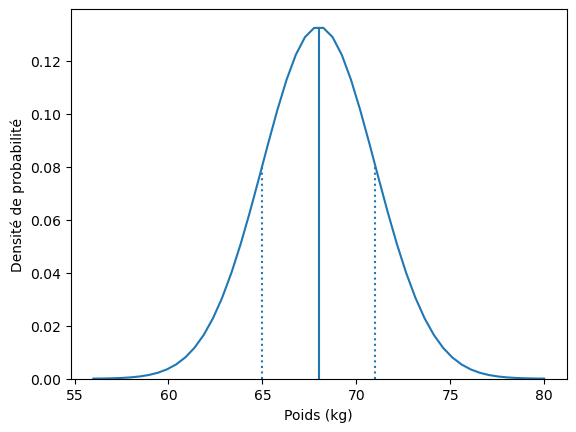

In [56]:
plt.plot(distribution_df['poids'],distribution_df['dens'])
plt.vlines(mu,ymin=0,ymax=norm.pdf(0)/sigma)
plt.vlines([mu-sigma,mu+sigma],ymin=0,ymax=norm.pdf(1)/sigma,linestyles='dotted')
plt.ylim(bottom=0)
plt.ylabel("Densité de probabilité")
plt.xlabel("Poids (kg)")
plt.show()

Générons 'une' population de 3000 individus correspondant à la description ci-dessus.

Il faut noter que cette population particulière, même si aléatoirament générée, sera toujours la même car nous avons initié le générateur de nombre aléatoire au début du programme (random.seed(1968)).

In [57]:
N = 3000
mu = 68.0
sigma = 3.0

population_df = pd.DataFrame({'poids':np.random.normal(loc=mu,scale=sigma,size=N)})
population_df.head()

,poids
0,63.149553
1,64.176075
2,69.785471
3,67.944671
4,68.092145


Représentons cette population en nuage de points.

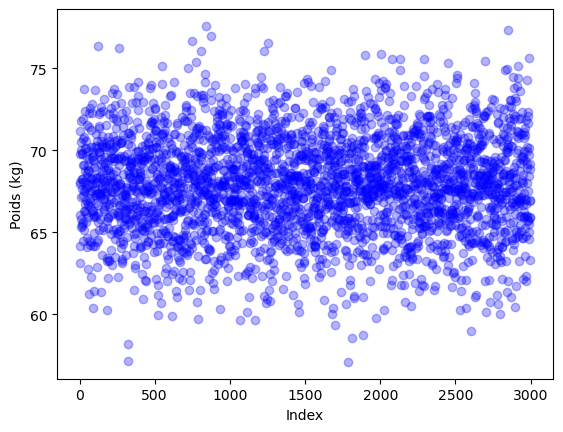

In [58]:
plt.plot(population_df['poids'],'o',color='blue',alpha=0.3)
plt.ylabel('Poids (kg)')
plt.xlabel('Index')
plt.show()

De ce nuage de poins, nous pouvons tirer un histogramme:

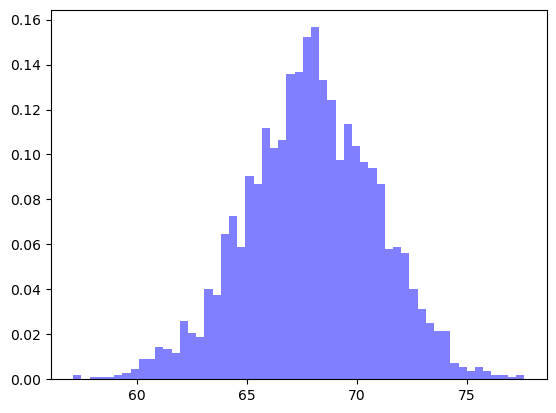

In [59]:
num_bins = round(math.sqrt(N))
n, bins, patches = plt.hist(population_df['poids'], num_bins, facecolor='blue', alpha=0.5, density=True)
plt.show()

Et nous pouvons superposer cet histogramme avec la distribution de densité de probabilité construite ci-dessus. Nous aurons:

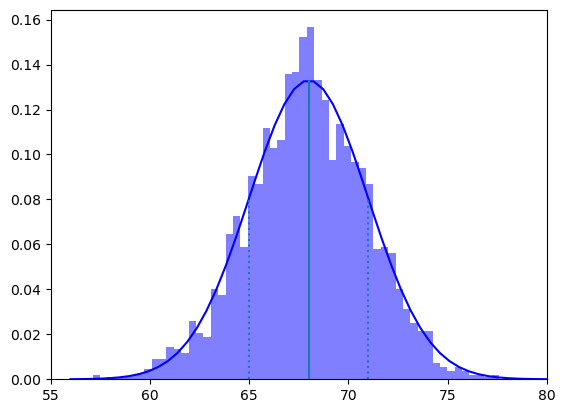

In [60]:
num_bins = round(math.sqrt(N))
n, bins, patches = plt.hist(population_df['poids'], num_bins, facecolor='blue', alpha=0.5, density=True)

plt.plot(distribution_df['poids'],distribution_df['dens'],color='blue')
plt.vlines(mu,ymin=0,ymax=norm.pdf(0)/sigma)
plt.vlines([mu-sigma,mu+sigma],ymin=0,ymax=norm.pdf(1)/sigma,linestyles='dotted')
plt.ylim(bottom=0)
plt.xlim(55,80)
plt.show()

## Exercice 11.1.a - Echantillons exhaustifs

On demande donc de tirer aléatoirement n_echantillons de taille donnée (taille_echantillon=25) de la population initiale et pour chacun de calculer sa moyenne.

Dans l'énoncé, on parle d'exécuter 80 échantillonnages mais rien ne nous empêche d'en faire beaucoup plus... maintenant que les moyens numériques sont là.
Je vous propose d'aller jusque 3000.

In [61]:
n_echantillons = 80

moyenne_list = []
taille_echantillon = 25

for i_echantillons in range(n_echantillons):
    echantillon = random.sample(list(population_df['poids']),taille_echantillon)
    moyenne_list.append(mean(echantillon))
    
poids_moyen_df = pd.DataFrame({'poids_moyen':moyenne_list})

In [62]:
poids_moyen_df['poids_moyen'].std(ddof=0)

0.5830089653088244

In [63]:
sigma_25 = 0.60

In [64]:
sigma_100 = 0.290

In [65]:
#
# Sans remise => exhaustif
#
n_echantillons = 1000

std_list = []
taille_echantillon_list = range(5,200,10)

for taille_echantillon in taille_echantillon_list:
    moyenne_list = []

    for i_echantillons in range(n_echantillons):
        echantillon = random.sample(list(population_df['poids']),taille_echantillon)
        moyenne_list.append(mean(echantillon))
    
    poids_moyen_df = pd.DataFrame({'poids_moyen':moyenne_list})
    std_list.append(poids_moyen_df['poids_moyen'].std(ddof=0))

std_df = pd.DataFrame()
std_df['taille_echantillon'] = taille_echantillon_list
std_df['std_sans_remise_exhaustif'] = std_list

In [66]:
#
# Avec remise => non exhaustif
#
n_echantillons = 1000

std_list = []
#taille_echantillon_list = range(25,200,25)

for taille_echantillon in taille_echantillon_list:
    moyenne_list = []

    for i_echantillons in range(n_echantillons):
        echantillon = random.choices(list(population_df['poids']),k=taille_echantillon)
        moyenne_list.append(mean(echantillon))
    
    poids_moyen_df = pd.DataFrame({'poids_moyen':moyenne_list})
    std_list.append(poids_moyen_df['poids_moyen'].std(ddof=0))

#std_df = pd.DataFrame()
#std_df['taille_echantillon'] = taille_echantillon_list
std_df['std_avec_remise_non_exhaustif'] = std_list

In [67]:
std_df

,taille_echantillon,std_sans_remise_exhaustif,std_avec_remise_non_exhaustif
0,5,1.331770,1.303522
1,15,0.755374,0.747561
2,25,0.614490,0.570571
3,35,0.506425,0.512001
4,45,0.422510,0.443268
5,55,0.417985,0.393987
6,65,0.359433,0.373369
7,75,0.326827,0.338420
8,85,0.329450,0.316690
9,95,0.297927,0.303462


In [68]:
std_df['calc_non_exhaustif'] = std_df['taille_echantillon'].apply(lambda x:sigma/math.sqrt(x))

In [69]:
std_df['calc_exhaustif'] = std_df['taille_echantillon'].apply(lambda x:sigma/math.sqrt(x)*math.sqrt((N-x)/(N-1)))

In [70]:
std_df.head()

,taille_echantillon,std_sans_remise_exhaustif,std_avec_remise_non_exhaustif,calc_non_exhaustif,calc_exhaustif
0,5,1.331770,1.303522,1.341641,1.340746
1,15,0.755374,0.747561,0.774597,0.772787
2,25,0.614490,0.570571,0.600000,0.597594
3,35,0.506425,0.512001,0.507093,0.504210
4,45,0.422510,0.443268,0.447214,0.443921


In [71]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True # pour pouvoir avec du LateX dans les labels des axes

alpha=0.8 

fig, ax = plt.subplots()

plt.scatter(std_df['taille_echantillon'],std_df['std_sans_remise_exhaustif'],alpha=alpha,label='Expérience - exhaustif')
plt.scatter(std_df['taille_echantillon'],std_df['std_avec_remise_non_exhaustif'],alpha=alpha,label='Expérience - non exhaustif')
plt.plot(std_df['taille_echantillon'],std_df['calc_exhaustif'],label='Formule - exhaustif')
plt.plot(std_df['taille_echantillon'],std_df['calc_non_exhaustif'],label='Formule - non exhaustif')
plt.xlabel('Taille échantillon - n')
plt.ylabel(r'$\sigma(\bar{X})$')

ax.legend()

plt.show()
matplotlib.rcParams['text.usetex'] = False # Allonge très fort les temps de processing pour les figures => OFF pour la suite

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 640x480 with 1 Axes>

Représentons les moyennes d'échantillon en nuage de points:

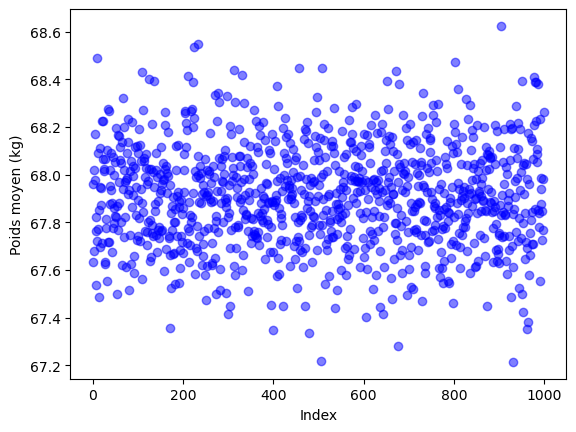

In [72]:
plt.plot(poids_moyen_df['poids_moyen'],'o',color='blue',alpha=0.5)
plt.ylabel('Poids moyen (kg)')
plt.xlabel('Index')
#plt.ylim(bottom=0)
plt.show()

... qui vous l'avouerez ressemble assez fortement au nuage de points de la population initiale... 

sauf la distribution en poids qui ici est moins grande!

Voyons ce qu'une représentation en histogramme donne:

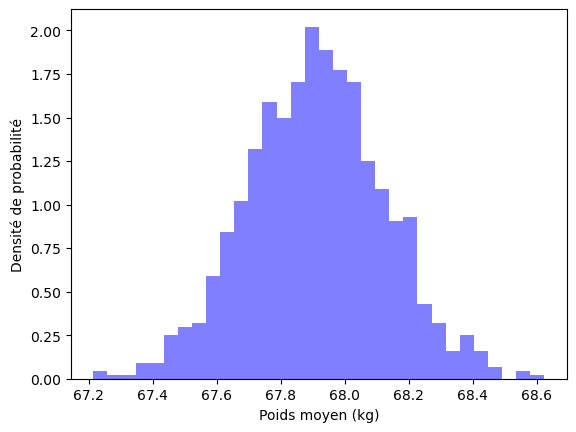

In [73]:
num_bins = round(math.sqrt(n_echantillons))
n, bins, patches = plt.hist(poids_moyen_df['poids_moyen'], num_bins, facecolor='blue', alpha=0.5, density=True)
plt.xlabel('Poids moyen (kg)')
plt.ylabel('Densité de probabilité')
plt.show()

In [74]:
poids_moyen_df[(poids_moyen_df['poids_moyen']>=66.8)&(poids_moyen_df['poids_moyen']<=68.3)].shape[0]/80

12.0875

Remarquons que l'allure générale du graphe est très proche de ce que nous avons trouvé précédemment.
Par contre, en regardant de plus près, on vois que la gaussienne est plus concentrée sur la valeur moyenne... 
ce qui explique pourquoi la densité est plus importante (maximum proche de 0.8)... pour garder l'aire sous la courbe à une valeur de 1!

Pour pouvoir comparer, ramenons notre graphe à la même échelle horizontale de poids soit l'intervalle [55,80].

Nous obtenons:

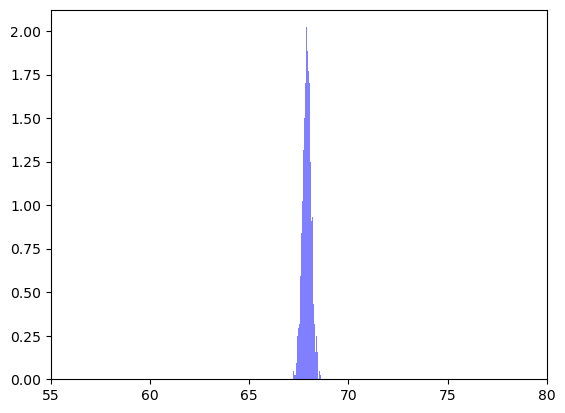

In [75]:
num_bins = round(math.sqrt(n_echantillons))
n, bins, patches = plt.hist(poids_moyen_df['poids_moyen'], num_bins, facecolor='blue', alpha=0.5, density=True)
plt.xlim(55,80)
plt.show()

Analytiquement, sans report, exhaustif, on devrait avoir une distribution centrée sur la même moyenne mais d'écart-type donné par:


In [76]:
sigma_echantillon_exhaustif = sigma/math.sqrt(taille_echantillon)*math.sqrt((N-taille_echantillon)/(N-1))

In [77]:
def distr_poids_echantillon(x):
    return norm.pdf((x['poids']-mu)/sigma_echantillon_exhaustif)/sigma_echantillon_exhaustif

In [78]:
distribution_echantillon_df = pd.DataFrame({'poids':np.linspace(poids_min,poids_max,150)})
distribution_echantillon_df['dens'] = distribution_echantillon_df.apply(distr_poids_echantillon,axis=1)

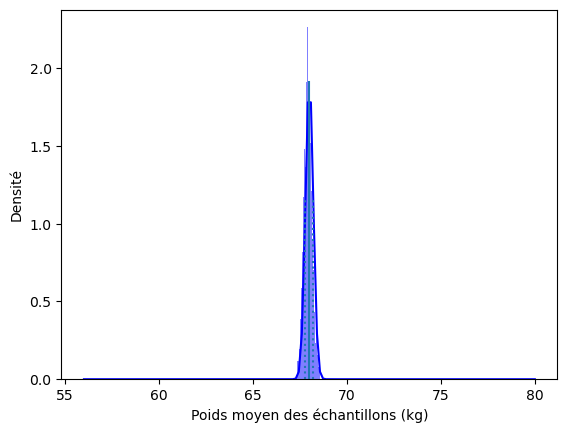

In [79]:
num_bins = round(math.sqrt(3000))
n, bins, patches = plt.hist(poids_moyen_df['poids_moyen'], num_bins, facecolor='blue', alpha=0.5, density=True)
plt.plot(distribution_echantillon_df['poids'],distribution_echantillon_df['dens'],color='blue')
plt.vlines(mu,ymin=0,ymax=norm.pdf(0)/sigma_echantillon_exhaustif)
plt.vlines([mu-sigma_echantillon_exhaustif,mu+sigma_echantillon_exhaustif],ymin=0,ymax=norm.pdf(1)/sigma_echantillon_exhaustif,linestyles='dotted')
plt.xlabel('Poids moyen des échantillons (kg)')
plt.ylabel('Densité')
plt.show()

## Exercice 11.1.b Echantillonnage non-exhaustif (avec remise).

Ici, on partira sur les mêmes bases: n_echantillons = 3000, taille d'échantillon = 25
    
Mais on utilisera la fonction random.choices() en lieu et place de random.sample() pour tirer des échantillons avec report.

In [80]:
n_echantillons = 80

moyenne_list = []
taille_echantillon = 25

for i_echantillons in range(n_echantillons):
    echantillon = random.choices(list(population_df['poids']),k=taille_echantillon)
    moyenne_list.append(mean(echantillon))
    
poids_moyen_df = pd.DataFrame({'poids_moyen':moyenne_list})

Représentons les moyennes d'échantillon en nuage de points:

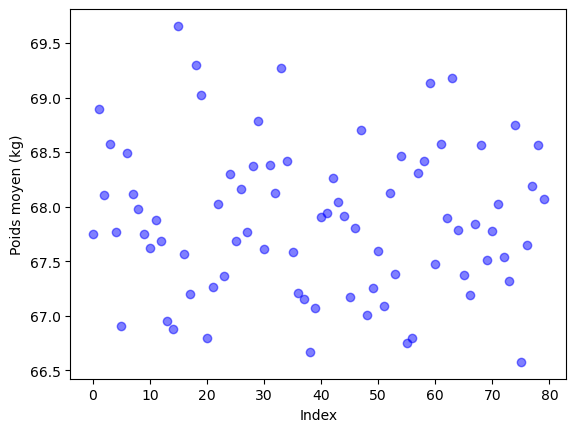

In [81]:
plt.plot(poids_moyen_df['poids_moyen'],'o',color='blue',alpha=0.5)
plt.ylabel('Poids moyen (kg)')
plt.xlabel('Index')
plt.show()

In [82]:
poids_moyen_df['poids_moyen'].mean()

67.87468818434172

In [83]:
poids_moyen_df['delta']=poids_moyen_df['poids_moyen']-poids_moyen_df['poids_moyen'].mean()

In [84]:
poids_moyen_df['delta2'] = poids_moyen_df['delta']**2

In [85]:
var = poids_moyen_df['delta2'].sum()/80
print('var:{}'.format(var))

var:0.457819315050034


In [86]:
sigma = math.sqrt(var)
print('sigma (numérique):{}'.format(sigma))

sigma (numérique):0.6766234662277344


In [87]:
sigma = 3/math.sqrt(25)
print('sigma (analytique):{}'.format(sigma))

sigma (analytique):0.6


Mêmes remarques que précédemment.

Voyons ce qu'une représentation en histogramme donne:

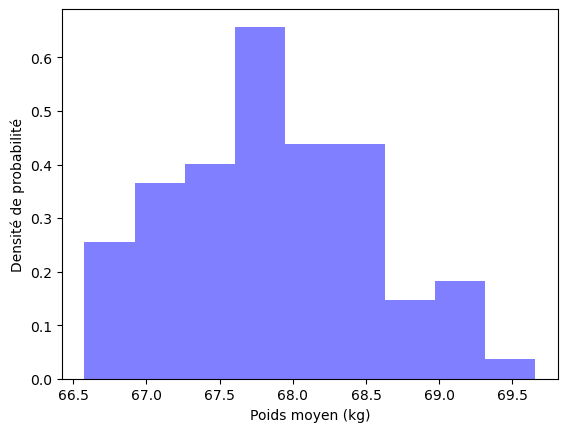

In [88]:
num_bins = round(math.sqrt(n_echantillons))
n, bins, patches = plt.hist(poids_moyen_df['poids_moyen'], num_bins, facecolor='blue', alpha=0.5, density=True)
plt.xlabel('Poids moyen (kg)')
plt.ylabel('Densité de probabilité')
plt.show()

Mêmes remarques que pour la distribution des moyennes des échantillons exhaustifs...

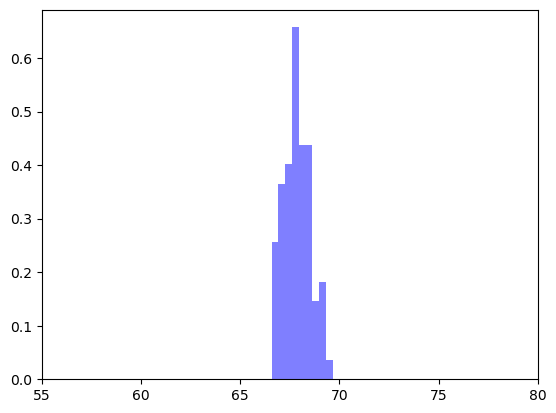

In [89]:
num_bins = round(math.sqrt(n_echantillons))
n, bins, patches = plt.hist(poids_moyen_df['poids_moyen'], num_bins, facecolor='blue', alpha=0.5, density=True)
plt.xlim(55,80)
plt.show()

Analytiquement, on devrait avoir une distribution centrée sur la même moyenne mais d'écart-type donné par:

In [90]:
sigma_echantillon_non_exhaustif = sigma/math.sqrt(taille_echantillon)

In [91]:
def distr_poids_echantillon(x):
    return norm.pdf((x['poids']-mu)/sigma_echantillon_non_exhaustif)/sigma_echantillon_non_exhaustif

In [92]:
distribution_echantillon_df = pd.DataFrame({'poids':np.linspace(poids_min,poids_max,150)})
distribution_echantillon_df['dens'] = distribution_echantillon_df.apply(distr_poids_echantillon,axis=1)

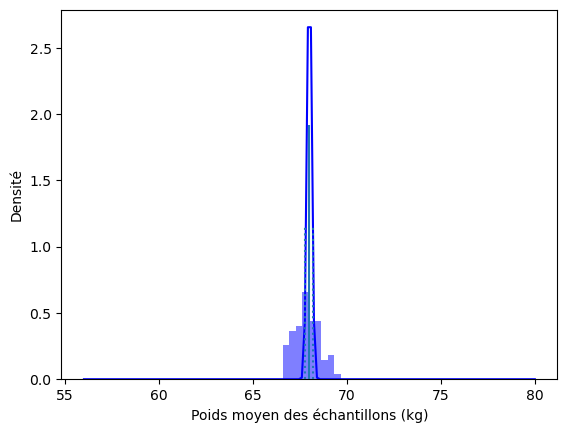

In [93]:
num_bins = round(math.sqrt(n_echantillons))
n, bins, patches = plt.hist(poids_moyen_df['poids_moyen'], num_bins, facecolor='blue', alpha=0.5, density=True)
plt.plot(distribution_echantillon_df['poids'],distribution_echantillon_df['dens'],color='blue')
plt.vlines(mu,ymin=0,ymax=norm.pdf(0)/sigma_echantillon_exhaustif)
plt.vlines([mu-sigma_echantillon_exhaustif,mu+sigma_echantillon_exhaustif],ymin=0,ymax=norm.pdf(1)/sigma_echantillon_exhaustif,linestyles='dotted')
plt.xlabel('Poids moyen des échantillons (kg)')
plt.ylabel('Densité')
plt.show()

A noter qu'à cette échelle, il n'est pas possible de voir une différence entre distribution d'échantillons exhaustifs ou non-exhaustifs.
En fait, la seule différence provient du facteur correctif:
$\sqrt{\frac{N-n}{N-1}}$ qui ici vaut: 

In [94]:
math.sqrt((N-taille_echantillon)/(N-1))

0.9959906286929351

Très très proche de 1... trop proche pour qu'on puisse différencier les représentations graphiques des deux distributions!

Pour cet effet soit plus visible, il faudrait que N et n se rapprochent... soit que la taille d'échantillon augmente ou que la taille de la population diminue :)

In [95]:
N = 100
mu = 68.0
sigma = 3.0

population_df = pd.DataFrame({'poids':np.random.normal(loc=mu,scale=sigma,size=N)})
population_df.head()

,poids
0,62.537990
1,68.554722
2,72.721590
3,70.359280
4,69.431335


In [96]:
#
# Sans remise => exhaustif
#
n_echantillons = 1000

std_list = []
taille_echantillon_list = range(5,100,10)

for taille_echantillon in taille_echantillon_list:
    moyenne_list = []

    for i_echantillons in range(n_echantillons):
        echantillon = random.sample(list(population_df['poids']),taille_echantillon)
        moyenne_list.append(mean(echantillon))
    
    poids_moyen_df = pd.DataFrame({'poids_moyen':moyenne_list})
    std_list.append(poids_moyen_df['poids_moyen'].std(ddof=0))

std_df = pd.DataFrame()
std_df['taille_echantillon'] = taille_echantillon_list
std_df['std_sans_remise_exhaustif'] = std_list

In [97]:
#
# Avec remise => non exhaustif
#
n_echantillons = 1000

std_list = []
#taille_echantillon_list = range(25,200,25)

for taille_echantillon in taille_echantillon_list:
    moyenne_list = []

    for i_echantillons in range(n_echantillons):
        echantillon = random.choices(list(population_df['poids']),k=taille_echantillon)
        moyenne_list.append(mean(echantillon))
    
    poids_moyen_df = pd.DataFrame({'poids_moyen':moyenne_list})
    std_list.append(poids_moyen_df['poids_moyen'].std(ddof=0))

#std_df = pd.DataFrame()
#std_df['taille_echantillon'] = taille_echantillon_list
std_df['std_avec_remise_non_exhaustif'] = std_list

In [98]:
std_df['calc_non_exhaustif'] = std_df['taille_echantillon'].apply(lambda x:sigma/math.sqrt(x))

In [99]:
std_df['calc_exhaustif'] = std_df['taille_echantillon'].apply(lambda x:sigma/math.sqrt(x)*math.sqrt((N-x)/(N-1)))

In [100]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True # pour pouvoir avec du LateX dans les labels des axes

alpha=0.8 

fig, ax = plt.subplots()

plt.scatter(std_df['taille_echantillon'],std_df['std_sans_remise_exhaustif'],alpha=alpha,label='Expérience - exhaustif')
plt.scatter(std_df['taille_echantillon'],std_df['std_avec_remise_non_exhaustif'],alpha=alpha,label='Expérience - non exhaustif')
plt.plot(std_df['taille_echantillon'],std_df['calc_exhaustif'],label='Formule - exhaustif')
plt.plot(std_df['taille_echantillon'],std_df['calc_non_exhaustif'],label='Formule - non exhaustif')
plt.xlabel('Taille échantillon - n')
plt.ylabel(r'$\sigma(\bar{X})$')

ax.legend()

plt.show()
matplotlib.rcParams['text.usetex'] = False # Allonge très fort les temps de processing pour les figures => OFF pour la suite

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 640x480 with 1 Axes>

Avec ces ordres de grandeur, on voit plus manifestement une différence entre les deux courbes... soit une tendance générale
à une plus grande dispersion (un plus grand sigma) pour des échantillons non-exhaustifs (avec remise) qu'exhaustifs (sans remise).

De plus, le modèle analytique rend assez bien compte de la réalité de notre expérience numérique!!!

Enfin, la différence entre les deux types d'échantillonnage est bien d'autant plus marquée que la taille d'échantillon
se rapproche de la taille de la population... comme annoncé!!!